In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os

C:\Users\460_2\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# CSV 파일이 있는 디렉토리 설정
directory = r'C:\Users\460_2\OneDrive - 세종과학예술영재학교 (1)\문서\세종과학예술영재학교\2학년\정보\인공지능\스팸 csv'

# 모든 CSV 파일 읽기
all_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.csv')]

# 각 파일을 DataFrame으로 읽어 리스트에 저장
all_dataframes = [pd.read_csv(file) for file in all_files]

# 모든 DataFrame 합치기
combined_csv = pd.concat(all_dataframes, ignore_index=True)

# 결과 저장
combined_csv.to_csv('spam_message.csv', index=False)

In [3]:
# data 확인해보기
data = pd.read_csv('spam_message.csv', low_memory=False, encoding='utf8')
print('총 샘플의 수 :',len(data))
data[:3]

총 샘플의 수 : 131329


,year,month,day,no,none,none.1,message,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2020.0,1,1.1,90100.0,***********,***********.1,[Web발신]*庚子年*새해에도건강과 幸福한삶소망하시는일모두 이루시길빕니다.서구의원 ...,2021.0,12.0,14500.0,아현이가 드리는 5장♥받으시고 대박나세요5장 출발 600출 도전!!쿄/드 6 3 7...
1,2020.0,1,1.0,90100.0,***********,***********,[Web발신]*庚子年*새해에도건강과 幸福한삶소망하시는일모두 이루시길빕니다.서구의원 ...,NaN,NaN,NaN,NaN
2,2020.0,1,1.0,90200.0,***********,***********,★미소 티켓★1월 재.충.전.가.능♡문의전화♡*새해복마니받으세요^^,NaN,NaN,NaN,NaN


In [4]:
# flag라는 열을 만들어 spam을 의미하는 1을 넣기
data['flag'] = '1'

# 결과를 새 CSV 파일로 저장
data.to_csv('spam_message.csv', index=False)

data.head()

,year,month,day,no,none,none.1,message,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,flag
0,2020.0,1,1.1,90100.0,***********,***********.1,[Web발신]*庚子年*새해에도건강과 幸福한삶소망하시는일모두 이루시길빕니다.서구의원 ...,2021.0,12.0,14500.0,아현이가 드리는 5장♥받으시고 대박나세요5장 출발 600출 도전!!쿄/드 6 3 7...,1
1,2020.0,1,1.0,90100.0,***********,***********,[Web발신]*庚子年*새해에도건강과 幸福한삶소망하시는일모두 이루시길빕니다.서구의원 ...,NaN,NaN,NaN,NaN,1
2,2020.0,1,1.0,90200.0,***********,***********,★미소 티켓★1월 재.충.전.가.능♡문의전화♡*새해복마니받으세요^^,NaN,NaN,NaN,NaN,1
3,2020.0,1,1.0,90200.0,***********,***********,★미소 티켓★1월 재.충.전.가.능♡문의전화♡*새해복마니받으세요^^,NaN,NaN,NaN,NaN,1
4,2020.0,1,1.0,94500.0,***********,***********,봄은 곧 다가옵니다.해처럼 밝고 모든 소망 이루시는 2020 새 해 되세요.전시의원...,NaN,NaN,NaN,NaN,1


In [5]:
# 일반 문자 데이터
data = pd.read_csv('ham_message.csv', low_memory=False, encoding='utf8')
print('총 샘플의 수 :',len(data))
data.head()

총 샘플의 수 : 10000


,message,flag
0,내일 뭐해? 할거 없으면 에스케이프 룸에서 볼래?,0
1,다음 주에 한라산로 휴가 가는 거 어때?,0
2,오늘 저녁 메뉴는 초콜릿 어때?,0
3,"아이 학교에서 푸드 페스티벌 가는데, 책 준비해야 해.",0
4,이번 주말에 콘서트 어때? 기자도 초대하고 싶어.,0


In [6]:
# flag를 일반 문자라는 의미의 0으로 모두 바꿔주기
data['flag'] = '0'

# 결과를 새 CSV 파일로 저장
data.to_csv('ham_message.csv', index=False)

data.head()

,message,flag
0,내일 뭐해? 할거 없으면 에스케이프 룸에서 볼래?,0
1,다음 주에 한라산로 휴가 가는 거 어때?,0
2,오늘 저녁 메뉴는 초콜릿 어때?,0
3,"아이 학교에서 푸드 페스티벌 가는데, 책 준비해야 해.",0
4,이번 주말에 콘서트 어때? 기자도 초대하고 싶어.,0


In [7]:
print('결측값 여부 :',data.isnull().values.any())

결측값 여부 : False


In [8]:
print('message열의 유니크한 값 :',data['message'].nunique())

message열의 유니크한 값 : 5155


In [9]:
# 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['message'], inplace=True)
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5155


In [10]:
# CSV 파일이 있는 디렉토리 설정
directory = r'C:\Users\460_2'

# 모든 CSV 파일 읽기
all_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.csv')]

# 각 파일을 DataFrame으로 읽어 리스트에 저장
all_dataframes = [pd.read_csv(file, low_memory=False) for file in all_files]

# 모든 DataFrame 합치기
combined_csv = pd.concat(all_dataframes, ignore_index=True)

# 결과 저장
combined_csv.to_csv('message_data.csv', index=False)

In [11]:
# 파일에서 전체 학습 데이터를 data라는 이름으로 가져오기
data = pd.read_csv('message_data.csv', low_memory=False, encoding='utf8')

# "flag" 열 값이 '1'인 경우 상위 5개 행 출력
spam_rows = data[data['flag'] == '1'].head(5)

# 결과 출력
spam_rows

,message,flag,year,month,day,no,none,none.1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
443987,[Web발신]*庚子年*새해에도건강과 幸福한삶소망하시는일모두 이루시길빕니다.서구의원 ...,1,2020.0,1.0,1.1,90100.0,***********,***********.1,2021.0,12.0,14500.0,아현이가 드리는 5장♥받으시고 대박나세요5장 출발 600출 도전!!쿄/드 6 3 7...
443988,[Web발신]*庚子年*새해에도건강과 幸福한삶소망하시는일모두 이루시길빕니다.서구의원 ...,1,2020.0,1.0,1.0,90100.0,***********,***********,NaN,NaN,NaN,NaN
443989,★미소 티켓★1월 재.충.전.가.능♡문의전화♡*새해복마니받으세요^^,1,2020.0,1.0,1.0,90200.0,***********,***********,NaN,NaN,NaN,NaN
443990,★미소 티켓★1월 재.충.전.가.능♡문의전화♡*새해복마니받으세요^^,1,2020.0,1.0,1.0,90200.0,***********,***********,NaN,NaN,NaN,NaN
443991,봄은 곧 다가옵니다.해처럼 밝고 모든 소망 이루시는 2020 새 해 되세요.전시의원...,1,2020.0,1.0,1.0,94500.0,***********,***********,NaN,NaN,NaN,NaN


In [12]:
# 사용하지 않는 열 제외하기
data = data.drop(columns=['none.1'])
data = data.drop(columns=['none'])
data = data.drop(columns=['year'])
data = data.drop(columns=['month'])
data = data.drop(columns=['no'])
data = data.drop(columns=['Unnamed: 7'])
data = data.drop(columns=['Unnamed: 8'])
data = data.drop(columns=['Unnamed: 9'])
data = data.drop(columns=['Unnamed: 10'])

In [13]:
# 잘 제외되었나 확인하기
data.head()

,message,flag,day
0,내일 뭐해? 할거 없으면 에스케이프 룸에서 볼래?,0,NaN
1,다음 주에 한라산로 휴가 가는 거 어때?,0,NaN
2,오늘 저녁 메뉴는 초콜릿 어때?,0,NaN
3,"아이 학교에서 푸드 페스티벌 가는데, 책 준비해야 해.",0,NaN
4,이번 주말에 콘서트 어때? 기자도 초대하고 싶어.,0,NaN


In [14]:
data = data.drop(columns=['day'])

In [15]:
data.head()

,message,flag
0,내일 뭐해? 할거 없으면 에스케이프 룸에서 볼래?,0
1,다음 주에 한라산로 휴가 가는 거 어때?,0
2,오늘 저녁 메뉴는 초콜릿 어때?,0
3,"아이 학교에서 푸드 페스티벌 가는데, 책 준비해야 해.",0
4,이번 주말에 콘서트 어때? 기자도 초대하고 싶어.,0


In [16]:
len(data)

706645

In [17]:
print('결측값 여부 :',data.isnull().values.any())

결측값 여부 : True


In [18]:
# 결측값이 포함된 행 제거
data = data.dropna()

# 결과 확인
data.head()

,message,flag
0,내일 뭐해? 할거 없으면 에스케이프 룸에서 볼래?,0
1,다음 주에 한라산로 휴가 가는 거 어때?,0
2,오늘 저녁 메뉴는 초콜릿 어때?,0
3,"아이 학교에서 푸드 페스티벌 가는데, 책 준비해야 해.",0
4,이번 주말에 콘서트 어때? 기자도 초대하고 싶어.,0


In [19]:
len(data)

549637

In [20]:
# v2 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['message'], inplace=True)
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 17710


<AxesSubplot:>

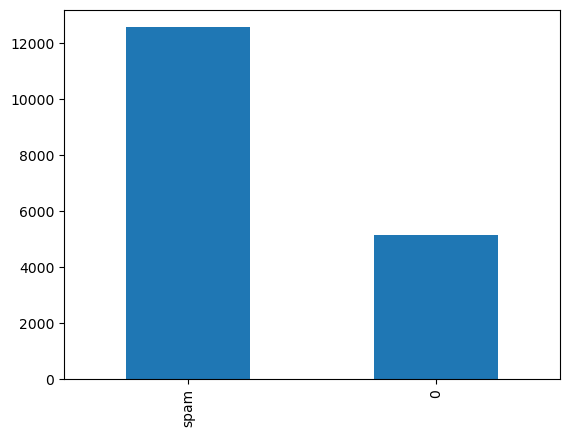

In [21]:
data['flag'].value_counts().plot(kind='bar')

In [22]:
print(f'정상 메일의 비율 = {round(data["flag"].value_counts()[0]/len(data) * 100,3)}%')
print(f'스팸 메일의 비율 = {round(data["flag"].value_counts()[1]/len(data) * 100,3)}%')

정상 메일의 비율 = 70.892%
스팸 메일의 비율 = 29.108%


In [23]:
X_data = data['message']
y_data = data['flag']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 17710
레이블의 개수: 17710


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [25]:
# y_train의 처음 10개 샘플 출력하여 체크
print(y_train.head(10))

428          0
9819         0
235266    spam
225415    spam
225529    spam
235122    spam
234862    spam
233492    spam
216212    spam
248871    spam
Name: flag, dtype: object


In [26]:
# flag가 'spam'인 항목을 '1'로 변경
data.loc[data['flag'] == 'spam', 'flag'] = '1'

In [27]:
# "flag" 열 값이 "1"인 경우 상위 5개 행 출력
spam_rows = data[data['flag'] == 'spam'].head(5)

# 결과 출력
spam_rows

,message,flag


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [29]:
print('--------훈련 데이터의 비율-----------')
print(f'정상 메일 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'스팸 메일 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

--------훈련 데이터의 비율-----------
정상 메일 = 70.892%
스팸 메일 = 29.108%


In [30]:
print('--------테스트 데이터의 비율-----------')
print(f'정상 메일 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'스팸 메일 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------테스트 데이터의 비율-----------
정상 메일 = 70.892%
스팸 메일 = 29.108%


In [31]:
# 케라스 토크나이저를 통해 훈련 데이터에 대해
# 토큰화와 정수 인코딩을 수행
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[994, 231, 995, 1790, 28], [43, 34, 1872, 46, 1401, 45, 29], [1, 1168, 3185, 80, 425, 17006, 1297], [2, 17007, 17008, 17009, 10488, 17010, 167, 7847, 64, 17011], [1, 3186, 365, 10489, 17012, 6349, 126, 1962, 638, 10490, 71, 17013, 610, 95, 10491, 4477, 17014, 7848, 1169, 7849, 17015, 17016, 738, 17017, 4072, 17018, 1018, 1531, 17019, 17020, 3187]]


In [32]:
# 각 정수에 어떤 단어가 부여되었는지 확인
word_to_index = tokenizer.word_index
print(word_to_index)

{'광고': 1, 'web발신': 2, '및': 3, '바랍니다': 4, '2': 5, '있습니다': 6, '1': 7, '가능': 8, '상품': 9, '무료거부': 10, '아래': 11, '등': 12, '본': 13, '오늘': 14, '00': 15, '한도': 16, '최대': 17, '같이': 18, '새로운': 19, '어때': 20, '5': 21, '이번': 22, '뭐해': 23, '또는': 24, '한번': 25, '2020년': 26, '8': 27, '할래': 28, '해': 29, '안녕하세요': 30, '볼래': 31, '3': 32, '주말에': 33, '학교에서': 34, '어제': 35, '안내드립니다': 36, '오늘은': 37, '전화': 38, '나랑': 39, '제출': 40, '부탁해': 41, '거절': 42, '아이': 43, '만나자': 44, '준비해야': 45, '가는데': 46, '초대하고': 47, '싶어': 48, '무조건': 49, '나왔대': 50, '하느라': 51, '늦었어': 52, '번호로': 53, '9': 54, '수수료': 55, '함께': 56, '따라': 57, '후': 58, '항상': 59, '1번': 60, '신청': 61, '금리': 62, '수': 63, 'kr': 64, '진행': 65, '7': 66, '접수자가': 67, 'ly': 68, '상품내용': 69, '하셔서': 70, '18': 71, '6': 72, '확인': 73, '이상': 74, '누르시면': 75, '금전': 76, '많으니': 77, '기존': 78, '대출': 79, '고객님의': 80, '발생하는': 81, '무료수신거부': 82, '직접': 83, '대상': 84, '문자수신번호로': 85, '최근': 86, '별도': 87, '만': 88, '지연될수': 89, '내용을': 90, 'hxxps': 91, 'bit': 92, '앱': 93, 'com': 94, '많은': 95, '가능합니다':

In [33]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 25778
단어 집합(vocabulary)에서 희귀 단어의 비율: 60.25290419091696
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 9.531627268928847


In [34]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 42784


메일의 최대 길이 : 319
메일의 평균 길이 : 19.088580


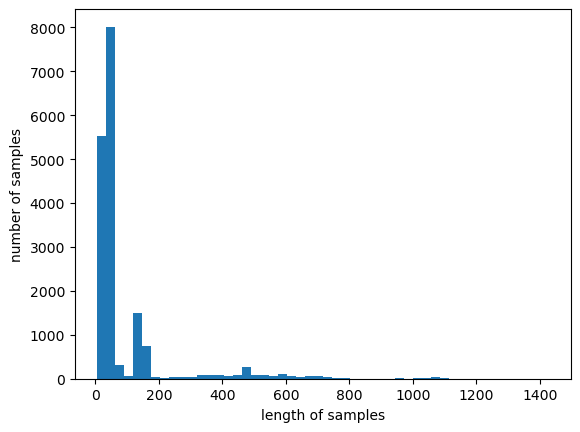

In [35]:
print('메일의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [36]:
max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (14168, 189)


In [37]:
y_train.head()

428       0
9819      0
235266    1
225415    1
225529    1
Name: flag, dtype: object

In [38]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4


UnimplementedError: Graph execution error:

Detected at node 'binary_crossentropy/Cast' defined at (most recent call last):
    File "C:\Users\460_2\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\460_2\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\460_2\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\460_2\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\460_2\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\460_2\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\460_2\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\460_2\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\460_2\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\460_2\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\460_2\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\460_2\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\460_2\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\460_2\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\460_2\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\460_2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\460_2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\460_2\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\460_2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\460_2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\460_2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\460_2\AppData\Local\Temp\ipykernel_24764\3696860418.py", line 13, in <module>
      history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\losses.py", line 2145, in binary_crossentropy
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'binary_crossentropy/Cast'
Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_1630]

In [39]:
# 오류가 발생한 원인 탐색
print("X_train_padded 값 범위:", X_train_padded.min(), "-", X_train_padded.max())
print("y_train 고유값:", y_train.unique())

X_train_padded 값 범위: 0 - 42783
y_train 고유값: ['0' '1']


In [40]:
# y_train의 값이 '0' 이렇게 되어있어 숫자가 아님을 한번 더 확인
print(y_train.dtype)

object


In [41]:
# y_train의 값이 float가 아닌 object임을 확인하였으므로 float로 변경
y_train = y_train.astype(float)

In [42]:
# X_train_padded의 최소값과 최대값 확인하여 x_train으로 인한 에러는 없을지 확인
min_value = X_train_padded.min()
max_value = X_train_padded.max()

print("X_train_padded 최소값:", min_value)
print("X_train_padded 최대값:", max_value)
print(vocab_size-1)

X_train_padded 최소값: 0
X_train_padded 최대값: 42783
42783


In [43]:
# y_train이 잘 변경되었는지 확인
y_train.head()

428       0.0
9819      0.0
235266    1.0
225415    1.0
225529    1.0
Name: flag, dtype: float64

In [44]:
# 모델 학습 (인터넷에 나온 코드 그대로)
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
178/178 [==============================] - 18s 88ms/step - loss: 0.2556 - acc: 0.9263 - val_loss: 0.0283 - val_acc: 0.9954
Epoch 2/4
178/178 [==============================] - 16s 90ms/step - loss: 0.0092 - acc: 0.9985 - val_loss: 9.6415e-04 - val_acc: 1.0000
Epoch 3/4
178/178 [==============================] - 16s 88ms/step - loss: 4.8601e-04 - acc: 0.9999 - val_loss: 4.5698e-04 - val_acc: 0.9996
Epoch 4/4
178/178 [==============================] - 16s 88ms/step - loss: 6.3414e-05 - acc: 1.0000 - val_loss: 1.9333e-04 - val_acc: 1.0000


In [45]:
# 테스트 정확도 확인
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

UnimplementedError: Graph execution error:

Detected at node 'binary_crossentropy/Cast' defined at (most recent call last):
    File "C:\Users\460_2\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\460_2\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\460_2\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\460_2\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\460_2\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\460_2\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\460_2\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\460_2\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\460_2\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\460_2\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\460_2\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\460_2\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\460_2\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\460_2\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\460_2\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\460_2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\460_2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\460_2\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\460_2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\460_2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\460_2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\460_2\AppData\Local\Temp\ipykernel_24764\478955738.py", line 4, in <module>
      print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\engine\training.py", line 2072, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\engine\training.py", line 1852, in test_function
      return step_function(self, iterator)
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\engine\training.py", line 1836, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\engine\training.py", line 1824, in run_step
      outputs = model.test_step(data)
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\460_2\anaconda3\lib\site-packages\keras\losses.py", line 2145, in binary_crossentropy
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'binary_crossentropy/Cast'
Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_test_function_7458]

In [46]:
# 테스트 데이터를 float로 변경하지 않아 아까와 같은 문제가 발생
y_test = y_test.astype(float)

In [47]:
# 테스트 데이터 정확도
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

111/111 [==============================] - 2s 18ms/step - loss: 1.1046e-04 - acc: 1.0000

 테스트 정확도: 1.0000


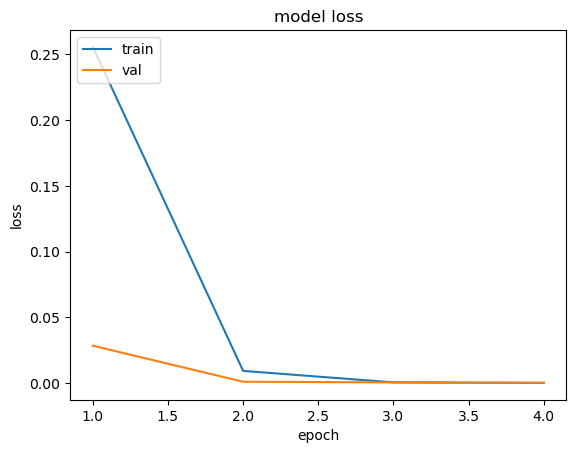

In [48]:
# loss 값 그림 그려보기
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [53]:
# 모델 학습 (직접 수정)
'''
epoch을 인터넷에서는 자료의 양이 부족해서 epoch을 4로 설정했는데 
인터넷보다 더 많은 데이터를 가지고 학습을 시키므로 최적 epoch을 보기 위해
early stopping을 도입해서 최적의 학습 epoch을 찾음
또한, 일반 문자 메세지를 거르면 안되므로 재현율을 출력하며 확인하였다.
'''
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss',  # 검증 손실을 모니터링
    patience=2,
    restore_best_weights=True  # 가장 좋은 가중치로 복원
)
from tensorflow.keras.metrics import Recall

# 모델 컴파일, 재현율 평가 지표 추가
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc', Recall(name='recall')])

# 모델 학습
history = model.fit(
    X_train_padded, 
    y_train, 
    epochs=10, 
    batch_size=64, 
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/10
178/178 [==============================] - 15s 77ms/step - loss: 9.7348e-06 - acc: 1.0000 - recall: 1.0000 - val_loss: 4.5777e-04 - val_acc: 0.9996 - val_recall: 0.9995
Epoch 2/10
178/178 [==============================] - 13s 74ms/step - loss: 8.3529e-06 - acc: 1.0000 - recall: 1.0000 - val_loss: 1.0181e-04 - val_acc: 1.0000 - val_recall: 1.0000
Epoch 3/10
178/178 [==============================] - 13s 73ms/step - loss: 7.4999e-06 - acc: 1.0000 - recall: 1.0000 - val_loss: 6.6299e-04 - val_acc: 0.9996 - val_recall: 0.9995
Epoch 4/10
178/178 [==============================] - 13s 75ms/step - loss: 6.6646e-06 - acc: 1.0000 - recall: 1.0000 - val_loss: 2.6402e-04 - val_acc: 1.0000 - val_recall: 1.0000


In [54]:
# 테스트 결과
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

111/111 [==============================] - 1s 11ms/step - loss: 4.5486e-05 - acc: 1.0000 - recall: 1.0000

 테스트 정확도: 1.0000


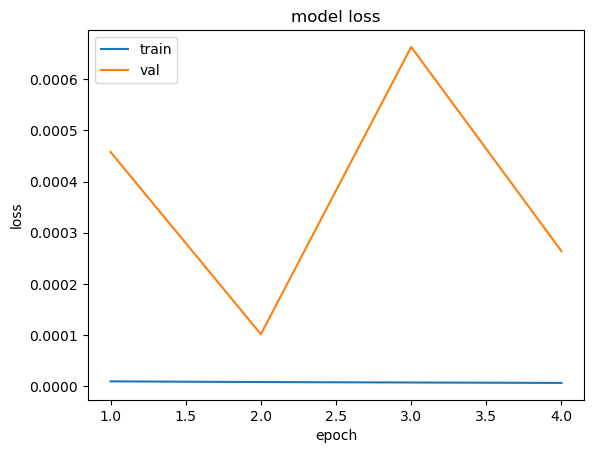

In [55]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [56]:
# 모델 학습 (옵티마이저를 Adam으로 변경)
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss',  # 검증 손실을 모니터링
    patience=2,
    restore_best_weights=True  # 가장 좋은 가중치로 복원
)
from tensorflow.keras.metrics import Recall

# 모델 컴파일, 재현율 평가 지표 추가
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['acc', Recall(name='recall')])

# 모델 학습
history = model.fit(
    X_train_padded, 
    y_train, 
    epochs=10, 
    batch_size=64, 
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/10
178/178 [==============================] - 19s 91ms/step - loss: 0.1692 - acc: 0.9697 - recall: 0.9574 - val_loss: 4.8381e-04 - val_acc: 0.9996 - val_recall: 0.9995
Epoch 2/10
178/178 [==============================] - 17s 93ms/step - loss: 1.3789e-04 - acc: 0.9999 - recall: 0.9999 - val_loss: 5.5811e-04 - val_acc: 0.9996 - val_recall: 0.9995
Epoch 3/10
178/178 [==============================] - 18s 100ms/step - loss: 2.0301e-05 - acc: 1.0000 - recall: 1.0000 - val_loss: 0.0011 - val_acc: 0.9996 - val_recall: 0.9995


In [57]:
# 테스트 결과
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

111/111 [==============================] - 1s 11ms/step - loss: 9.1600e-04 - acc: 0.9994 - recall: 0.9992

 테스트 정확도: 0.9994


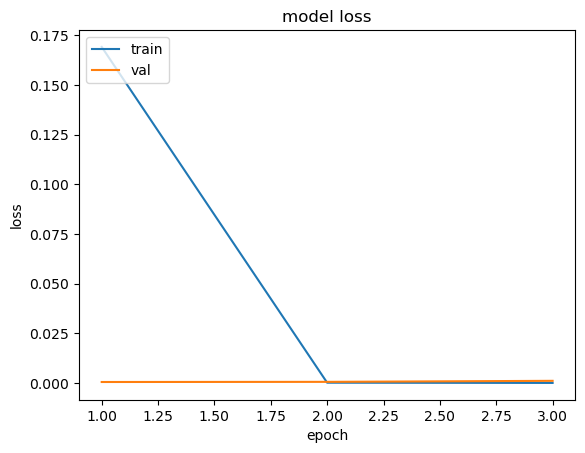

In [58]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 중간에 조금 loss 값이 튀긴 하지만 잘 학습됨을 확인하였다!